In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('avito.csv')
data = data.drop(['Unnamed: 0'], axis=1)
data.head(5)

/home/Albert/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Марка,Модель,Год выпуска,Тип кузова,Цена,Объём двигателя,Цвет,Привод,Руль,Тип двигателя,Состояние,Владельцев по ПТС,Количество дверей,Мощность двигателя,Пробег,VIN или номер кузова,Коробка передач,Ссылка
0,Audi,A8,2010,седан,990 000,4.2,чёрный,полный,левый,бензин,не битый,1,4.0,340 л.с.,160000 км,WAUZZZ4H*BN****23,автомат,https://www.avito.ru/moskva/avtomobili/audi_a8...
1,Audi,A8,2007,седан,1 250 000,6.0,серый,полный,левый,бензин,не битый,1,4.0,450 л.с.,41075 км,WAUZZZ4E*7N****87,автомат,https://www.avito.ru/moskva/avtomobili/audi_a8...
2,Audi,Q5,2009,универсал,660 000,2.0,серый,полный,левый,бензин,не битый,2,5.0,211 л.с.,157000 км,WAUZZZ8R*AA****95,автомат,https://www.avito.ru/moskva/avtomobili/audi_q5...
3,Audi,Q5,2009,внедорожник,769 999,2.0,белый,полный,левый,бензин,не битый,2,NaN,211 л.с.,81000 км,WAUZZZ8R*AA****51,автомат,https://www.avito.ru/moskva/avtomobili/audi_q5...
4,Audi,Q7,2007,внедорожник,770 000,3.6,чёрный,полный,левый,бензин,не битый,2,5.0,280 л.с.,175000 км,WAUZZZ4L*8D****67,автомат,https://www.avito.ru/moskva/avtomobili/audi_q7...


#### Преобразовываю данные в флоат

In [4]:
data['Цена'] = [float(x.replace(' ', '')) for x in data['Цена']]
data['Объём двигателя'] = pd.to_numeric(data['Объём двигателя'], errors='coerce')
data['Владельцев по ПТС'] = pd.to_numeric(data['Владельцев по ПТС'], errors='coerce')
data['Мощность двигателя'] = [float(x.split('л')[0]) for x in data['Мощность двигателя']]
data['Пробег'] = [str(x) for x in data['Пробег']]
data['Пробег'] = [float(x.replace('км', '')) for x in data['Пробег']]

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41104 entries, 0 to 41103
Data columns (total 18 columns):
Марка                   41104 non-null object
Модель                  41104 non-null object
Год выпуска             41104 non-null int64
Тип кузова              41104 non-null object
Цена                    41104 non-null float64
Объём двигателя         41016 non-null float64
Цвет                    41104 non-null object
Привод                  41104 non-null object
Руль                    41104 non-null object
Тип двигателя           41104 non-null object
Состояние               34397 non-null object
Владельцев по ПТС       31247 non-null float64
Количество дверей       30300 non-null float64
Мощность двигателя      41104 non-null float64
Пробег                  34397 non-null float64
VIN или номер кузова    41104 non-null object
Коробка передач         41104 non-null object
Ссылка                  41104 non-null object
dtypes: float64(6), int64(1), object(11)
memory usage: 5.6

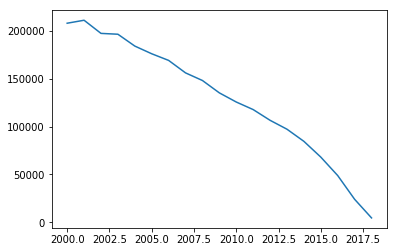

In [19]:
df_kms = data.groupby(by='Год выпуска')['Пробег'].mean()
# plt.plot(data['Пробег'], data['Год выпуска'])
plt.plot(df_kms)

Ебану бейслайн

In [8]:
data_new = data

#### Ебанул все наны

In [22]:
data_new['Состояние'] = data_new['Состояние'].fillna('не битый')
data_new['Владельцев по ПТС'] = data_new['Владельцев по ПТС'].fillna(0)
data_new = data_new.drop(['Количество дверей'], axis=0)
data_new['Пробег'] = data_new['Пробег'].fillna(0)
data_new['Объём двигателя'] = data_new['Объём двигателя'].fillna(data_new['Объём двигателя'].mean())

In [24]:
data_new.to_csv('avito_wo_nan.csv')

In [23]:
data_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41104 entries, 0 to 41103
Data columns (total 17 columns):
Марка                   41104 non-null object
Модель                  41104 non-null object
Год выпуска             41104 non-null int64
Тип кузова              41104 non-null object
Цена                    41104 non-null float64
Объём двигателя         41104 non-null float64
Цвет                    41104 non-null object
Привод                  41104 non-null object
Руль                    41104 non-null object
Тип двигателя           41104 non-null object
Состояние               41104 non-null object
Владельцев по ПТС       41104 non-null float64
Мощность двигателя      41104 non-null float64
Пробег                  41104 non-null float64
VIN или номер кузова    41104 non-null object
Коробка передач         41104 non-null object
Ссылка                  41104 non-null object
dtypes: float64(5), int64(1), object(11)
memory usage: 5.3+ MB


In [25]:
# data_new = data_new.drop(['VIN или номер кузова', 'Ссылка'], axis=1)

data_dummies = pd.get_dummies(data=data_new, columns=['Марка','Модель','Тип кузова','Цвет',
                                                      'Привод', 'Руль', 'Тип двигателя',
                                                      'Состояние', 'Коробка передач'])
data_dummies.head(5)

,Год выпуска,Цена,Объём двигателя,Владельцев по ПТС,Мощность двигателя,Пробег,VIN или номер кузова,Ссылка,Марка_Audi,Марка_BMW,...,Тип двигателя_газ,Тип двигателя_гибрид,Тип двигателя_дизель,Тип двигателя_электро,Состояние_ битый,Состояние_не битый,Коробка передач_автомат,Коробка передач_вариатор,Коробка передач_механика,Коробка передач_робот
0,2010,990000.0,4.2,1.0,340.0,160000.0,WAUZZZ4H*BN****23,https://www.avito.ru/moskva/avtomobili/audi_a8...,1,0,...,0,0,0,0,0,1,1,0,0,0
1,2007,1250000.0,6.0,1.0,450.0,41075.0,WAUZZZ4E*7N****87,https://www.avito.ru/moskva/avtomobili/audi_a8...,1,0,...,0,0,0,0,0,1,1,0,0,0
2,2009,660000.0,2.0,2.0,211.0,157000.0,WAUZZZ8R*AA****95,https://www.avito.ru/moskva/avtomobili/audi_q5...,1,0,...,0,0,0,0,0,1,1,0,0,0
3,2009,769999.0,2.0,2.0,211.0,81000.0,WAUZZZ8R*AA****51,https://www.avito.ru/moskva/avtomobili/audi_q5...,1,0,...,0,0,0,0,0,1,1,0,0,0
4,2007,770000.0,3.6,2.0,280.0,175000.0,WAUZZZ4L*8D****67,https://www.avito.ru/moskva/avtomobili/audi_q7...,1,0,...,0,0,0,0,0,1,1,0,0,0


In [27]:
data_dummies = data_dummies.drop(['VIN или номер кузова', 'Ссылка'], axis=1)

In [28]:
import numpy as np

In [29]:
X = data_dummies.drop(['Цена'], axis=1).values
y = data_dummies['Цена'].values

from sklearn.preprocessing import Normalizer

transformer = Normalizer().fit(X) # fit does nothing.
transformer
Normalizer(copy=True, norm='l2')
transformer.transform(X)
X

array([[2.010e+03, 4.200e+00, 1.000e+00, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       [2.007e+03, 6.000e+00, 1.000e+00, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       [2.009e+03, 2.000e+00, 2.000e+00, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       ...,
       [2.012e+03, 2.400e+00, 2.000e+00, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       [2.012e+03, 2.400e+00, 2.000e+00, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       [2.010e+03, 2.500e+00, 3.000e+00, ..., 0.000e+00, 0.000e+00,
        0.000e+00]])

In [71]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
         X, y, test_size=0.2, random_state=42)

In [99]:
from sklearn import linear_model
clf = linear_model.Lasso(alpha=0.1)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

/home/Albert/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


0.5956535406747852

In [100]:
y_pred = clf.predict(X_test)

In [ ]:
from sklearn.model_selection import GridSearchCV
alphas = np.linspace(0.1, 10000)
param_grid = {"alpha": alphas}

grid = GridSearchCV(clf, param_grid=param_grid, cv=5)
grid.fit(X_train, y_train)

/home/Albert/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/Albert/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/Albert/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/Albert/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not co